# Example 2.3: GD of a logistic regression neuron

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pylab as plt

In [2]:
# set learning parameters
no_epochs = 500
lr = 0.4

SEED = 10
np.random.seed(SEED)

In [3]:
# training data
X = np.array([[1.33, 0.72], [-1.55, -0.01], [0.62, -0.72],
    [0.27, 0.11], [0.0, -0.17], [0.43, 1.2], [-0.97, 1.03], [0.23, 0.45]])
Y = np.array([0, 1, 1, 1, 1, 0, 0, 0]).reshape(8,1)

print('X: {}'.format(X))
print('Y: {}'.format(Y))

X: [[ 1.33  0.72]
 [-1.55 -0.01]
 [ 0.62 -0.72]
 [ 0.27  0.11]
 [ 0.   -0.17]
 [ 0.43  1.2 ]
 [-0.97  1.03]
 [ 0.23  0.45]]
Y: [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]


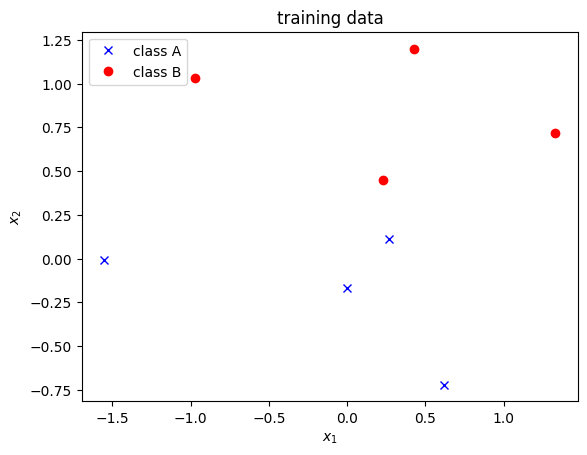

In [4]:
# plot training data
plt.figure(1)
plt.plot(X[Y[:,0]==1,0], X[Y[:,0]==1,1],'bx', label ='class A')
plt.plot(X[Y[:,0]==0,0], X[Y[:,0]==0,1],'ro', label='class B')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('training data')
plt.legend()

In [5]:
class Logistic():
  def __init__(self):
    self.w = torch.tensor(np.random.rand(2,1), dtype=torch.double, requires_grad=True)
    self.b = torch.tensor(0., dtype=torch.double, requires_grad=True)

  def __call__(self, x):
    u = torch.matmul(torch.tensor(x), self.w) + self.b
    logits = torch.sigmoid(u)
    
    return u, logits

In [6]:
def train(model, inputs, targets, learning_rate):
  _, logits = model(inputs)
  
  loss = nn.BCELoss()
  loss_ = loss(logits, torch.tensor(targets, dtype=torch.double))
  err = torch.sum(torch.not_equal(logits > 0.5, torch.tensor(targets)))
  
  loss_.backward()

  with torch.no_grad():
      model.w -= learning_rate * model.w.grad
      model.b -= learning_rate * model.b.grad

  model.w.grad = None
  model.b.grad = None
    
  return loss_, err

In [8]:
model = Logistic()

print('w: {}, b: {}'.format(model.w.detach().numpy(), model.b.detach().numpy()))

w: [[0.63364823]
 [0.74880388]], b: 0.0


In [11]:
entropy, err = [], []
for epoch in range(no_epochs):

  entropy_, err_ = train(model, X, Y, learning_rate=lr)
  
  # for first epoch, print values
  if (epoch == 0):
    with torch.no_grad():
        print('entropy:{}'.format(entropy_))
        print('error:{}'.format(err_))
        print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

  if epoch%100 == 0:
      print('Epoch %2d:  entropy: %2.5f, error: %d'%(epoch, entropy_.detach().numpy(), err_.detach().numpy()))

  entropy.append(entropy_.detach().numpy()), err.append(err_.detach().numpy())

entropy:0.9000199480217459
error:6
w: [[0.39423738]
 [0.35272905]], b: -0.055415607544952616
Epoch  0:  entropy: 0.90002, error: 6
Epoch 100:  entropy: 0.17528, error: 0
Epoch 200:  entropy: 0.12111, error: 0
Epoch 300:  entropy: 0.09815, error: 0
Epoch 400:  entropy: 0.08459, error: 0


In [12]:
# print learned weights and error
print('w: %s, b: %s'%(model.w.detach().numpy(), model.b.detach().numpy()))
print('entropy: %2.5f, error: %d'%(entropy[-1], err[-1]))

w: [[-1.17278605]
 [-7.21275637]], b: 2.26531062557559
entropy: 0.07537, error: 0


Text(0, 0.5, 'cross-entropy')

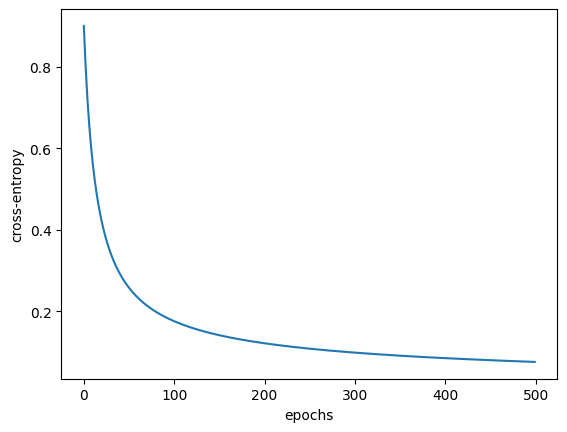

In [13]:
# plot learning curves
plt.figure(2)
plt.plot(range(no_epochs), entropy)
plt.xlabel('epochs')
plt.ylabel('cross-entropy')

Text(0.5, 0, 'epochs')

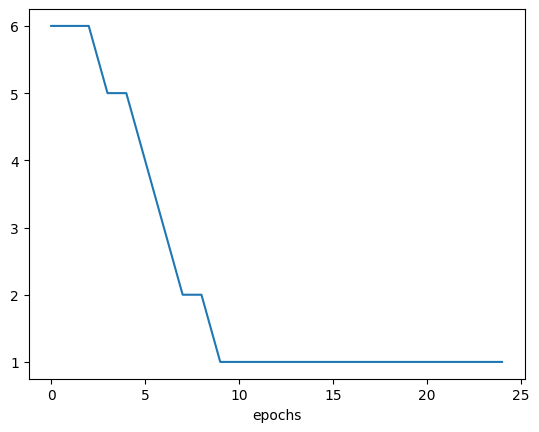

In [14]:
plt.figure(3)
plt.plot(range(25), np.array(err)[:25])
plt.xlabel('epochs')

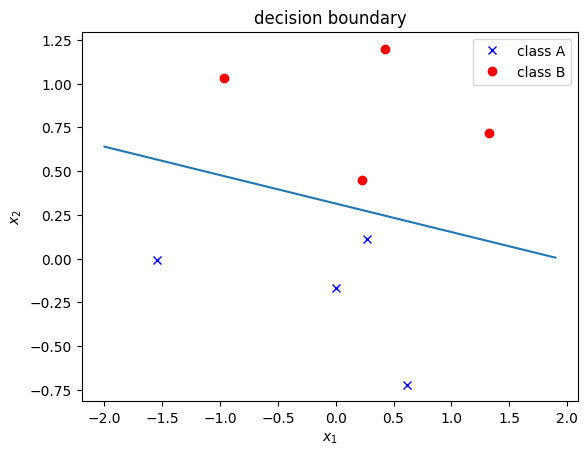

In [16]:
# plot the decision boundary
x1 = np.arange(-2, 2, 0.1)
x2 = -(x1*model.w.detach().numpy()[0] + model.b.detach().numpy())/model.w.detach().numpy()[1]

plt.figure(4)
plt.plot(X[Y[:,0]==1,0], X[Y[:,0]==1,1],'bx', label ='class A')
plt.plot(X[Y[:,0]==0,0],X[Y[:,0]==0,1],'ro', label='class B')
plt.plot(x1, x2, '-')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('decision boundary')
plt.legend()